# Puissances en régime alternatif sinus

Illustration des puissances (instantanée, active, réactive, apparente..) en régime alternatif, pour :
- un circuit **monophasé** (c.-à-d. pas triphasé)
- dans le cas de tensions et courants **sinusoïdaux** (c.-à-d. le cas le plus simple et classique des circuits alternatifs)

PH, oct 2024 (2022 pour [JupyterLite](https://jupyterlite.readthedocs.io/), 2024 pour tracé à P fixée).
- TODO : ajouter représentation vectorielle

Packages Python nécessaires: Matplotlib (tracés) et ipywidgets (widgets interactifs)

---

Installer Jupyter widgets dans JupyterLite:

In [1]:
try:
    import piplite
    await piplite.install('ipywidgets')
except ImportError: # si ce notebook est exécuté hors de JupyterLite
    pass

Quelques imports et définitions de helper functions

In [2]:
import numpy as np
from numpy import pi, sin, cos

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from ipywidgets import interact, fixed

In [4]:
# conversion rad <-> deg
d2r = np.deg2rad
r2d = np.rad2deg

vecteur de phase pour les graphiques $\theta \in [0 , 2\pi]$:

In [5]:
th_max = 2*pi 
th = np.linspace(0, th_max, 100)

---

## Définition des tension et courant sinus 
pour la simplicité des graphs, courant et tensions sont choisi d'amplitude $\hat{V} = \hat{I} = 1$:

$$ v = \hat{V} sin(\theta) $$
$$ i = \hat{I} sin(\theta - \varphi) $$

où $\theta$ est la phase, qui sur un réseau à fréquence fixe évolue linéairement avec le temps $t$: 

$$\theta = 2\pi.f.t$$

ainsi, les graphs suivant sont gradués en phase, mais ce sont bien des tracés temporels

Cette situation de courant retardé d'un angle $\varphi$ apparait lorsqu'on alimente une impédance $\underline{Z} = Ze^{j\varphi}$ avec une tension sinus. Autrement dit, l'angle de retard du courant est égal à l'angle de l'impédance.

### Valeur efficace d'un signal sinusoïdal 

Soit signal $x(t)$ périodique de période $T=1/f$.

**Définition** de la valeur efficace (Root Mean Square en anglais → *racine de la moyenne du carré*):
$$ rms(x) = \sqrt{ \langle x^2(t) \rangle_{t \in [0,T]} }$$

où la notation $\langle x^2(t) \rangle_{t \in [0,T]}$ signifie “moyenne pour $t$ entre $0$ et $T$ du signal $x^2$”

**Propriété**: lien entre valeur efficace et amplitude, *dans le cas d'un signal sinus*:

$$ rms(x) = \frac{amplitude(x)}{\sqrt{2}} \approx 0.71 \, amplitude(x)$$

**Notation**: lettre majuscule pour les valeurs efficaces: $V$ et $I$ (donc $V = \hat{V}/\sqrt{2}$ pour une tension sinus)

Calcul numérique (basé sur l'interprétation numérique définition) et illustration sur le cas sinus:

In [6]:
def rms(x):
    '''valeur efficace du signal x
    (valable si x est fournit sur un nombre entier de période!)
    '''
    return np.sqrt(np.mean(x**2))

In [7]:
print('Tension efficace pour un signal sinus d’amplitude 1 :')
print('- calcul numérique : ', rms(sin(th))) # x=sin(th)
print('- valeur théorique : ', 1/np.sqrt(2))

Tension efficace pour un signal sinus d’amplitude 1 :
- calcul numérique :  0.7035623639735143
- valeur théorique :  0.7071067811865475


### Tracé V,I

Fonction de tracé

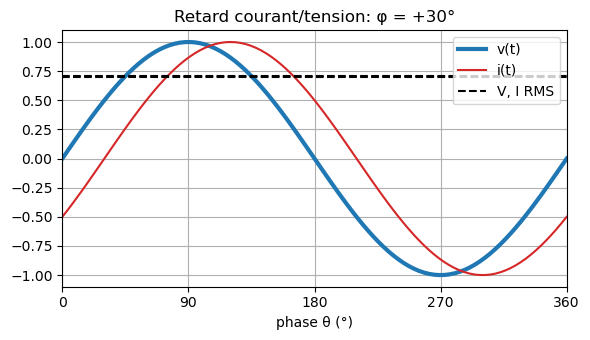

In [8]:
def plot_vi(phi_deg):
    '''tracé tension-courant, avec retard phi(°)'''
    phi = d2r(phi_deg)
    v = sin(th)
    i = sin(th-phi)
    
    fig, ax = plt.subplots(1,1, figsize=(6,3.5), num=1)
    ax.plot(r2d(th), v, label='v(t)', lw=3)
    ax.plot(r2d(th), i, label='i(t)', color='tab:red')
    ax.hlines([rms(v), rms(i)], 0, r2d(th_max), label='V, I RMS',
              colors='black', linestyles='--')
    
    plt.xlim(0, r2d(th_max))
    plt.xticks([0, 90, 180, 270, 360])
    plt.xlabel('phase θ (°)')
    plt.title(f'Retard courant/tension: φ = {phi_deg:+.0f}°') # force affichage signe phi
    plt.grid(True)
    plt.legend()
    fig.tight_layout()
    plt.show()

# Essai de la fonction
plot_vi(30)

Tracé interactif

In [9]:
interact(plot_vi, phi_deg=(0, 90, 5));

interactive(children=(IntSlider(value=45, description='phi_deg', max=90, step=5), Output()), _dom_classes=('wi…

## Puissances en régime alternatif

### Définitions

* instantanée: $p(t) = v(t).i(t)$
* active: $P = \langle p(t) \rangle_{t\in[0,T]}$ (moyenne sur une période)
* apparente: $S = V.I$ (produit des valeurs efficaces)

### Propriété

dans le cas sinusoidal (tension  et courant) la puissance instantannée p(t) est la somme:
  * d'une composante moyenne $P = V.I.cos \varphi$
  * et d'un terme pulsant à fréquence double (c.-à-d. 100 Hz sur un réseau 50 Hz)

### Tracés V,I,P

Fonction de tracé

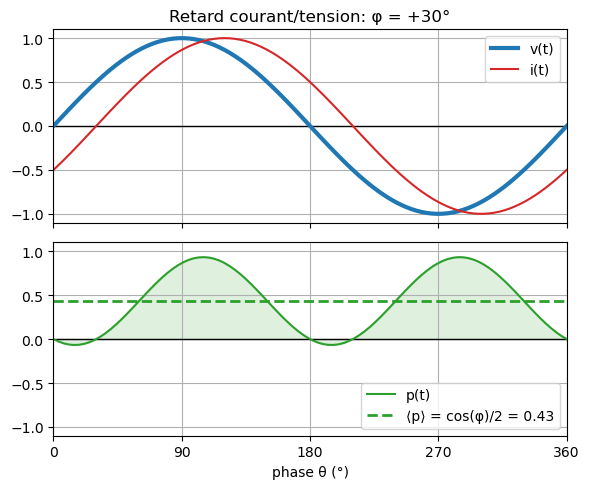

In [10]:
def plot_vip(phi_deg, save_path=None):
    '''tracé tension-courant-puissance, avec retard phi(°)'''
    phi = d2r(phi_deg)
    v = sin(th)
    i = sin(th-phi)
    p = v*i
    
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(6,5), sharex=True, num=2)
    ax1.axhline(0, color='black', lw=1) # line v,i=0
    ax1.plot(r2d(th), v, label='v(t)', lw=3)
    ax1.plot(r2d(th), i, label='i(t)', color='tab:red')
    
    ax2.axhline(0, color='black', lw=1) # line p=0
    col_p = 'tab:green' # 'tab:purple'
    ax2.plot(r2d(th), p, color=col_p, label='p(t)')
    ax2.fill_between(r2d(th), p, color=col_p, alpha=0.15)
    ax2.axhline(cos(phi)/2, label='⟨p⟩ = cos(φ)/2 = {:.2f}'.format(cos(phi)/2),
               color=col_p, linestyle='--', lw=2)
    
    ax1.set(
        title=f'Retard courant/tension: φ = {phi_deg:+.0f}°', # force affichage signe phi
    )
    ax2.set(
        xlim=(0, r2d(th_max)),
        xlabel='phase θ (°)',
        ylim=(-1.1, 1.1),
        xticks = [0, 90, 180, 270, 360]
    )
    ax1.legend(loc='upper right')
    ax1.grid(True)
    ax2.legend(loc='lower right')
    ax2.grid(True)
    
    fig.tight_layout()
    # save plot (optional)
    if save_path is not None:
        fig.savefig(save_path, dpi=200)
    plt.show()

# Test de la fonction
plot_vip(30)

#### Cas particulier:

* Inductance idéale: 90°
* Condensateur idéal: -90°

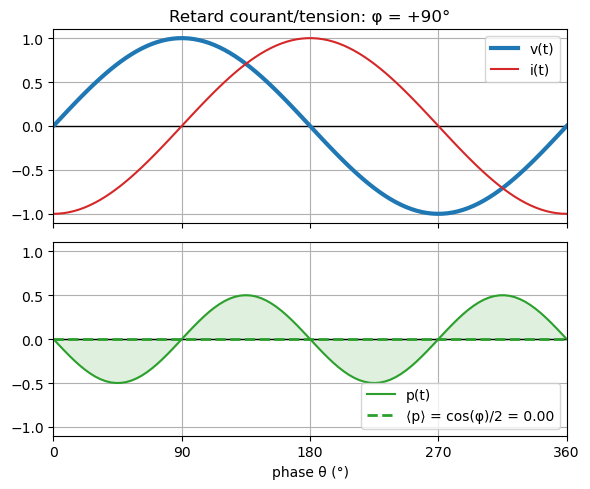

In [11]:
plot_vip(90)

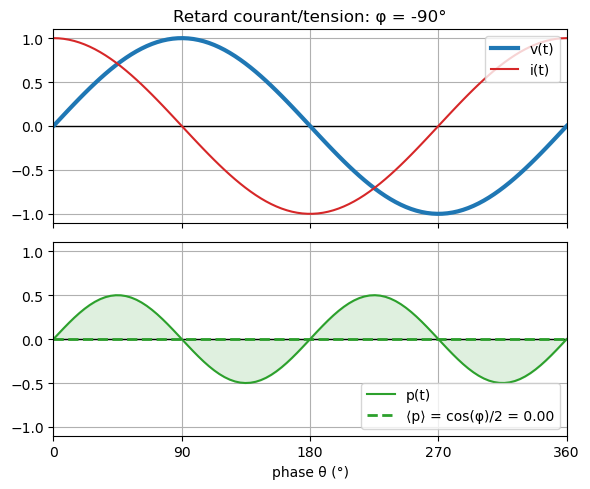

In [12]:
plot_vip(-90)

#### Tracé v, i, p interactif

In [13]:
interact(plot_vip, phi_deg=(-180, 180, 10), save_path=fixed(None));

interactive(children=(IntSlider(value=0, description='phi_deg', max=180, min=-180, step=10), Output()), _dom_c…

Sauvegarde d'une série de graphs pour phi de -175° → 180° *(à décommenter pour activer)*

In [14]:
for phi_deg in range(-175, 181, 5):
    plt.close()
    # détail: offset +1000, cad -90 → 910, pour que les noms de fichiers pour les valeurs négatives soient bien triés
    save_path = 'vip_phi{:04.0f}.png'.format(phi_deg+1000)
    #plot_vip(phi_deg, save_path)

---

## Transert de puissance à différents ratio Q/P=tanφ

Dans la partie précédente, on étudiait une impédance de module donné, dont on faisait varier l'angle.

On illustre ici le cas d'un appareil souhaitant injecter (ou consommer) une **puissance active donnée** $P$, tout en faisant **varier la puissance réactive** $Q$. On choisit typiquement $Q$  proportionnelle à $P$, ce qui s'exprime en fixant une valeur de $\tan \varphi = Q/P$.

C'est par exemple le fonctionnement de beaucoup d'onduleurs photovoltaïques :
* $P \approx P_{panneaux}$ (aux pertes de l'onduleur près)
* $\tan \varphi$ dicté par le gestionnaire du réseau (selon son souhait d'ajuster la tension à la hausse ou la baisse)

On observera également que c'est avec $\tan \varphi = 0$ que $S$ et $I$ sont minimisés ($S=P$ quand $Q=0$). Ainsi, en l'absence de problème de tension trop haute ou basse, le réglage $\tan \varphi = 0$ est préférable pour minimiser les pertes Joule sur le réseau.

Fonction de tracé

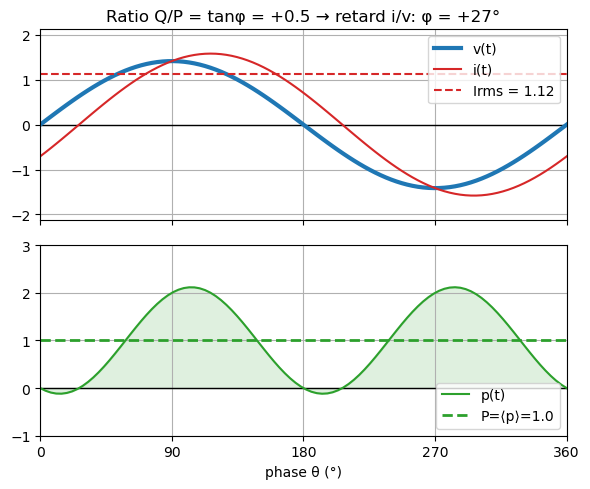

In [15]:
def plot_viptan(tan_phi, save_path=None):
    '''tracé tension-courant-puissance, à P=1 fixé et Q=tanφ×P'''
    Vampl = np.sqrt(2) # amplitude tension
    P = 1
    Q = P*tan_phi
    S = np.sqrt(P**2+Q**2) # S=Vampl*Iampl/2
    Iampl = 2*S/Vampl
    Irms = Iampl/np.sqrt(2)
    phi = np.atan(tan_phi)
    phi_deg = r2d(phi)
     
    v = Vampl*sin(th)
    i = Iampl*sin(th-phi)
    p = v*i
    
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(6,5), sharex=True, num=3)
    ax1.axhline(0, color='black', lw=1) # line v,i=0
    ax1.plot(r2d(th), v, label='v(t)', lw=3)
    ax1.plot(r2d(th), i, label='i(t)', color='tab:red')
    ax1.axhline(Irms, label=f'Irms = {Irms:.2f}',
                linestyle='--', color='tab:red')
    
    ax2.axhline(0, color='black', lw=1) # line p=0
    col_p = 'tab:green' # 'tab:purple'
    ax2.plot(r2d(th), p, color=col_p, label='p(t)')
    ax2.fill_between(r2d(th), p, color=col_p, alpha=0.15)
    ax2.axhline(P, label=f'P=⟨p⟩={P:.1f}',
               color=col_p, linestyle='--', lw=2)
    
    ax1.set(
        title=f'Ratio Q/P = tanφ = {tan_phi:+.1f} → retard i/v: φ = {phi_deg:+.0f}°',
        ylim=(-Vampl*1.5, Vampl*1.5),
    )
    ax2.set(
        xlim=(0, r2d(th_max)),
        xlabel='phase θ (°)',
        ylim=(-1*P, 3*P),
        xticks = [0, 90, 180, 270, 360]
    )
    ax1.legend(loc='upper right')
    ax1.grid(True)
    ax2.legend(loc='lower right')
    ax2.grid(True)
    
    fig.tight_layout()
    # save plot (optional)
    if save_path is not None:
        fig.savefig(save_path, dpi=200)
    plt.show()

# Test de la fonction
plot_viptan(0.5)

### Tracé  interactif

In [16]:
interact(plot_viptan, tan_phi=(-1.5, 1.5, 0.1), save_path=fixed(None));

interactive(children=(FloatSlider(value=0.0, description='tan_phi', max=1.5, min=-1.5), Output()), _dom_classe…

Sauvegarde d'une série de graphs pour tanφ de -1.5 à +1.5 *(à décommenter pour activer)*

In [17]:
for tan_phi in np.arange(-1.5, 1.55, 0.1):
    plt.close()
    # détail: offset +10, cad -1.5 → 8.5, pour que les noms de fichiers pour les valeurs négatives soient bien triés
    save_path = 'vip_tanphi{:04.1f}.png'.format(tan_phi+10) 
    #plot_viptan(tan_phi, save_path)